<a href="https://colab.research.google.com/github/JavierAlbert/Variational_Autoencoders/blob/master/deep_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Autoencoder

Let's now go a bit deeper and add layers to the network, still fully dense layers.

In [0]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
# Reshape images to 784 pixels and stack them
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
input_img = Input(shape=(784,))

# Encoding layers
encode = Dense(128, activation='relu')(input_img)
encode = Dense(64, activation='relu')(encode)
encode = Dense(32, activation='relu')(encode)

# Decoding layers
decode = Dense(64, activation='relu')(encode)
decode = Dense(128, activation='relu')(decode)
decode = Dense(784, activation='sigmoid')(decode)

In [12]:
# Define Model
encode_decode = Model(input_img, decode)

# Compile Model
encode_decode.compile(optimizer='adadelta', loss='binary_crossentropy')

# Fit
encode_decode.fit(x_train, x_train,
                  epochs=50,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test),
                  verbose=0)

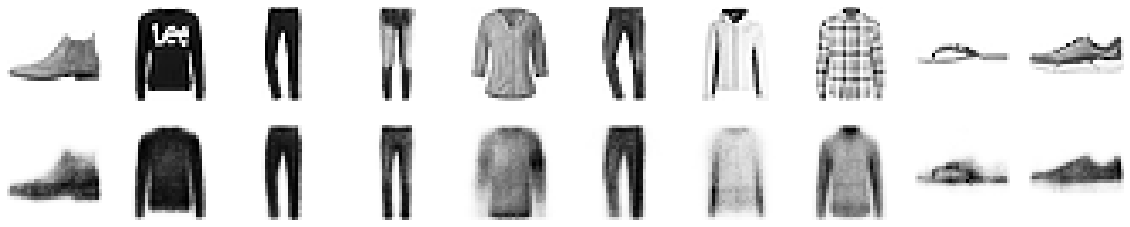

In [13]:
# Let's use the autoencoder on some of the test images
decoded_imgs = encode_decode.predict(x_test)

# Now we can take a look
plt.figure(figsize=(20, 4))
for i in range(10):
  
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()